<h1><center>Tutorial 4: Simulating flight trajectories</center></h1>
<div style="text-align: center">Adnane Ez-zizi, 30 Oct 2019</div> 

## 0. Preliminary steps

In [1]:
### Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
#%precision 3

### Set options
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
plt.rc('figure', figsize=(7, 5))
np.set_printoptions(precision=4, suppress=True)

In [2]:
### To be able to show dynamic plots in Jupyter
%matplotlib notebook

## 1. Plotting the trajectory of one drone

In [3]:
### Loading the dataset
data_1dr = pd.read_csv('./Data/example_trajectory.csv', index_col = 0)
data_1dr

,X,Y
8:00,0.0,0.0
8:05,0.6,1.3
8:10,1.4,3.2
8:15,2.4,5.4
8:20,3.2,7.3
8:25,3.7,8.7
8:30,4.0,9.4
8:35,4.6,9.9
8:40,6.4,10.6
8:45,10.0,12.0


In [4]:
len(data_1dr)

10

<IPython.core.display.Javascript object>


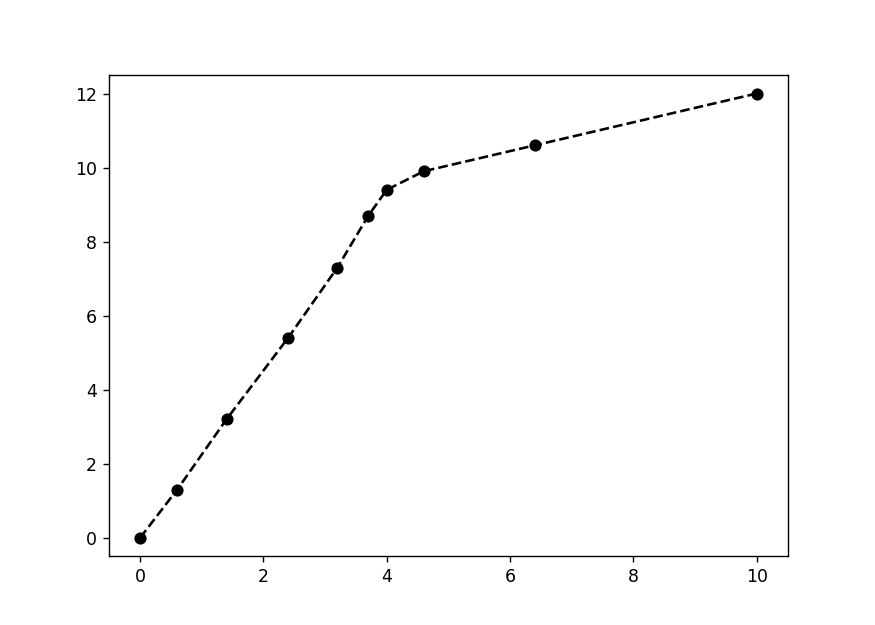

In [5]:
### 1st dirty attempt (works)

xdata = []
ydata = []
fig = plt.figure()

axes = plt.gca()
axes.set_xlim(data_1dr['X'].min() - 0.5, data_1dr['X'].max() + 0.5)
axes.set_ylim(data_1dr['Y'].min() - 0.5, data_1dr['Y'].max() + 0.5)
trajectory, = axes.plot(xdata, ydata, 'ko--')
 
for i in range(len(data_1dr)):
    xdata.append(data_1dr.loc[data_1dr.index[i], 'X'])
    ydata.append(data_1dr.loc[data_1dr.index[i], 'Y'])
    trajectory.set_xdata(xdata)
    trajectory.set_ydata(ydata)
    fig.canvas.draw()
    time.sleep(0.1)
 
# add this if you don't want the window to disappear at the end
fig.canvas.draw()

<IPython.core.display.Javascript object>


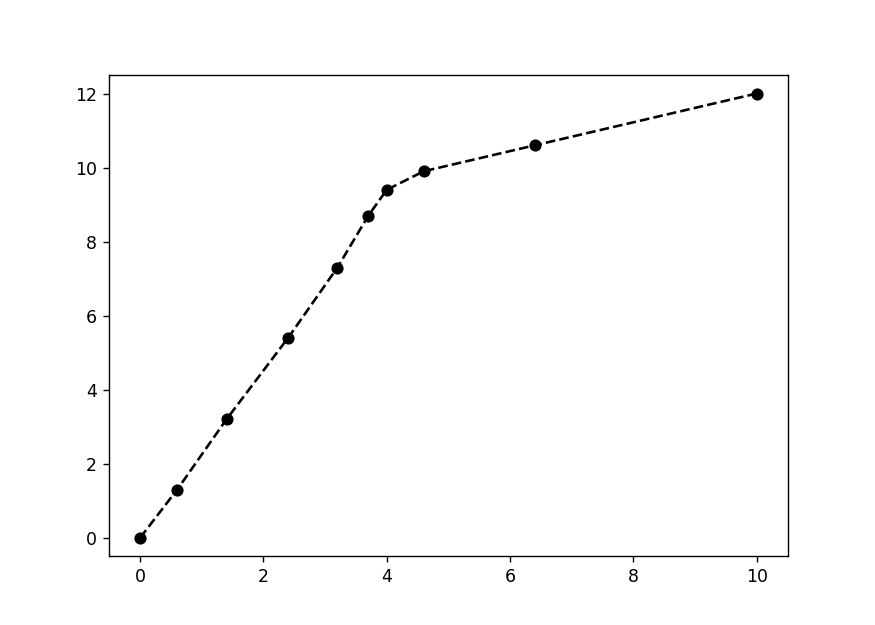

In [6]:
### 2nd attempt: make a function that automatically update the trajectory after each new x and y values read
### from the dataset

def update_trajectory(tr, i, data):
    tr.set_xdata(data.loc[data.index[:(i+1)], 'X'])
    tr.set_ydata(data.loc[data.index[:(i+1)], 'Y'])
                              
fig = plt.figure()
axes = plt.gca()
axes.set_xlim(data_1dr['X'].min() - 0.5, data_1dr['X'].max() + 0.5)
axes.set_ylim(data_1dr['Y'].min() - 0.5, data_1dr['Y'].max() + 0.5)
trajectory, = axes.plot([], [], 'ko--')

for i in range(len(data_1dr)):
    update_trajectory(trajectory, i, data_1dr)
    fig.canvas.draw()
    time.sleep(0.3)
 
# add this if you don't want the window to disappear at the end
fig.canvas.draw()

<IPython.core.display.Javascript object>


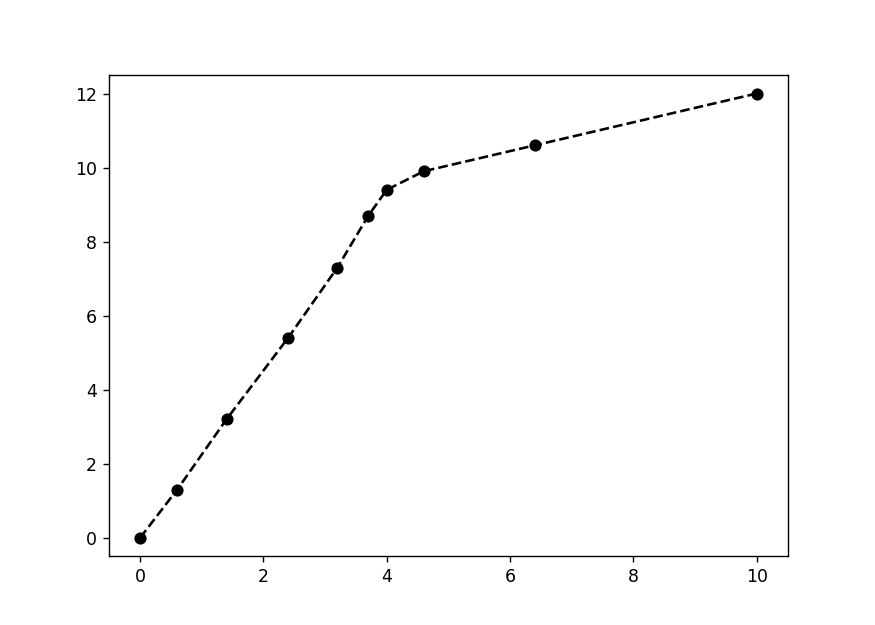

In [7]:
### Third attempt: take into consideration that there might be empty values in the dataset 
### (i.e. NaN values if for example the drone hasn't been launched)

def update_trajectory(tr, i, data):
    xdata_now = trajectory.get_xdata()
    ydata_now = trajectory.get_ydata()
    if np.isnan(data.iloc[i, 0]) == False:
        xdata_now = np.append(xdata_now, data.iloc[i, 0])
        tr.set_xdata(xdata_now)
    if np.isnan(data.iloc[i, 1]) == False:
        ydata_now = np.append(ydata_now, data.iloc[i, 1])
        tr.set_ydata(ydata_now)

xdata = []
ydata = []
fig = plt.figure()
axes = plt.gca()
axes.set_xlim(data_1dr['X'].min() - 0.5, data_1dr['X'].max() + 0.5)
axes.set_ylim(data_1dr['Y'].min() - 0.5, data_1dr['Y'].max() + 0.5)
trajectory, = axes.plot(xdata, ydata, 'ko--')

for i in range(len(data_1dr)):
    update_trajectory(trajectory, i, data_1dr)
    fig.canvas.draw()
    time.sleep(0.1)
 
# add this if you don't want the window to disappear at the end
fig.canvas.draw()

## 2. Plotting the trajectory of multiple drones

In [8]:
### Load the data (notice the format)
data_2dr = pd.read_csv('./Data/example_2drones.csv', index_col = 0)
data_2dr

,X1,Y1,X2,Y2
08:00,0.0,0.0,NaN,NaN
08:05,0.6,1.3,9.0,7.0
08:10,1.4,3.2,7.8,7.2
08:15,2.4,5.4,5.9,7.4
08:20,3.2,7.3,4.7,7.5
08:25,3.7,8.7,3.9,8.0
08:30,4.0,9.4,2.0,10.0
08:35,4.6,9.9,NaN,NaN
08:40,6.4,10.6,NaN,NaN
08:45,10.0,12.0,NaN,NaN


In [9]:
# data_2dr.iloc[0, 2].isna()
np.isnan(data_2dr.iloc[0, 2])

True

<IPython.core.display.Javascript object>


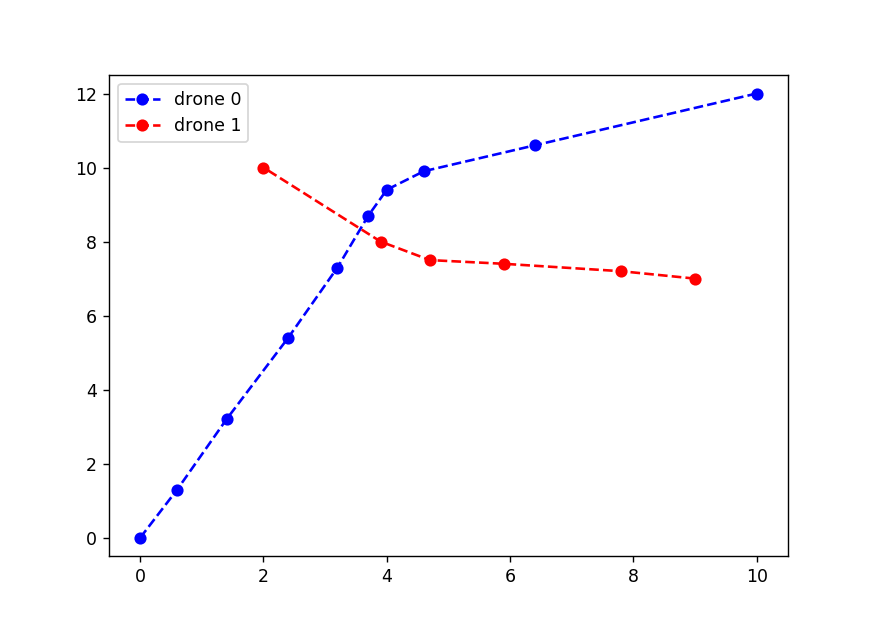

In [10]:
### Params
all_trajectories = [] # initialise a list that will contain all drones' trajectories
N_traj = 2 # num of drones
colors = ['b', 'r'] # colors to use (think about automatising this to work with any number of drones)
#colors = ['k', 'b', 'c', 'g', 'm', 'r', 'y']

def update_trajectory(tr, i, data):
    xdata_now = trajectory.get_xdata()
    ydata_now = trajectory.get_ydata()
    if np.isnan(data.iloc[i, 0]) == False:
        xdata_now = np.append(xdata_now, data.iloc[i, 0])
        tr.set_xdata(xdata_now)
    if np.isnan(data.iloc[i, 1]) == False:
        ydata_now = np.append(ydata_now, data.iloc[i, 1])
        tr.set_ydata(ydata_now)

fig = plt.figure()
axes = plt.gca()
### !!! These need to be generalised (take the min and max for all drones) !!!
axes.set_xlim(data_2dr['X1'].min() - 0.5, data_2dr['X1'].max() + 0.5)
axes.set_ylim(data_2dr['Y1'].min() - 0.5, data_2dr['Y1'].max() + 0.5)

for i in range(N_traj):
    trajectory, = axes.plot([], [], color = colors[i], linestyle='dashed', marker='o', label=('drone ' + str(i)))
    axes.legend(loc='upper left')
    all_trajectories.append(trajectory)

for i in range(len(data_2dr)):
    for j, trajectory in enumerate(all_trajectories):
        update_trajectory(trajectory, i, data_2dr.iloc[:,(2*j):(2*j+2)])
        fig.canvas.draw()
        time.sleep(0.1)
 
# add this if you don't want the window to disappear at the end
fig.canvas.draw()

### Nice extensions to make:
# - Generalise the calculation of x-axis and y-axis scale (min and max from all drones' trajectories)
# - Add the current time in the title 
# - Add annotation to highlight a collision (use ax.text())
# - Make the program work with an arbitrary number of drones